<a href="https://colab.research.google.com/github/VictorGuui/INPE/blob/master/Atividade4_6INPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.7 MB/s eta 0:00:00


In [5]:
import cartopy.crs as ccrs

In [6]:
import cartopy.feature as cfeature

In [7]:
pip install geopandas

In [8]:
import geopandas as gpd

In [9]:
import pandas as pd


In [10]:
import matplotlib.gridspec as gridspec

In [11]:
estados = gpd.read_file("/content/drive/MyDrive/BR_UF_2022.shx")

In [12]:
dsetAnomalia = xr.open_dataset("/content/drive/MyDrive/Climatologia_AmericaDoSul_CHIRPS.nc")

In [13]:
lat = dsetAnomalia.latitude.values
lon = dsetAnomalia.longitude.values
var = dsetAnomalia['precip']

In [14]:
dsetAnomalia

<xarray.Dataset>
Dimensions:    (time: 513, longitude: 1200, latitude: 1300)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-09-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.6
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    history:           Thu Dec 07 10:46:23 2023: cdo sellonlatbox,-90,-30,-60...
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

In [15]:
precipitacao = dsetAnomalia['precip']

A variável de precipitação é extraída dos dados climatológicos, criando um objeto DataArray. Isso facilita a manipulação e análise dos dados específicos.

In [16]:
media_climatologica = precipitacao.groupby('time.month').mean(dim='time')

 - Aqui eu crio uma média climatologica para o periodo de 1991-2020



In [17]:
media_climatologica

<xarray.DataArray 'precip' (month: 12, latitude: 1300, longitude: 1200)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [  9.449406 ,   9.41632  ,   8.135473 , ...,         nan,
                 nan,         nan],
        [ 10.982964 ,  10.978391 ,   9.706948 , ...,         nan,
                 nan,         nan],
        [ 11.446143 ,  11.360567 ,  11.299158 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 36.034687 ,  35.568024 ,  35.432877 , ...,         nan,
                 nan,         nan],
        [ 38.21811  ,  37.756866 ,  36.42834  , ...,         nan,
                 nan,         nan],
        [ 47.323406 ,  47.778255 ,  43.1532   , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 12.184708 ,  10.762709 ,  11.66452  , ...,         nan,
                 nan,         nan],
        [ 14.6178875,  14.283046 ,  15.214145 , ...,         nan,
                 nan,         nan],
        [ 18.517475 ,  18.015427 ,  17.959719 , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [18]:
ano = 2004
mes = 1
anomalia_jan_2004 = var.sel(time=f'{ano}-{mes:02d}') - media_climatologica.sel(month=mes)

- Criação da Anomalia para Janeiro de 2004:
A anomalia de precipitação para janeiro de 2004 é calculada subtraindo a média climatológica do valor real para esse mês. Isso destaca onde a precipitação foi maior ou menor do que o esperado para janeiro.

- Seleção do Primeiro Instante de Tempo:
Finalmente, é selecionado o primeiro instante de tempo da anomalia (janeiro de 2004), tornando mais fácil a plotagem.

- `ano = 2004`: Define o ano como 2004.
- `mes = 1`: Define o mês como janeiro, sendo que em Python, os meses são numerados de 1 a 12.
- `f'{ano}-{mes:02d}'`: Cria uma string formatada para representar a data no formato 'ano-mês'. O `:02d` significa que o valor do mês deve ser formatado com pelo menos dois dígitos, preenchendo com zeros à esquerda se necessário. Portanto, para janeiro (mes = 1), será representado como '01'.
- `var.sel(time=f'{ano}-{mes:02d}')`: Seleciona os dados da variável `var` (que parece ser uma variável de precipitação) para o mês e ano específicos. Isso utiliza a função `sel` do Xarray para fazer a seleção baseada na dimensão temporal (`time`).
- `media_climatologica.sel(month=mes)`: Seleciona a média climatológica para o mesmo mês. A média climatológica foi calculada anteriormente para cada mês ao longo do período de dados.
- `anomalia_jan_2004 = `: Calcula a anomalia subtraindo a média climatológica do valor real de precipitação para janeiro de 2004.

In [19]:
anomalia_jan_2004 = anomalia_jan_2004.isel(time=0)

In [20]:
anomalia_jan_2004

<xarray.DataArray 'precip' (latitude: 1300, longitude: 1200)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.9340425, -1.803699 , -1.4902964, ...,        nan,        nan,
               nan],
       [-2.548132 , -2.4274492, -2.142043 , ...,        nan,        nan,
               nan],
       [-2.896576 , -2.9728546, -2.6758013, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2004-01-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
    month      int64 1

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<GeoAxes: >

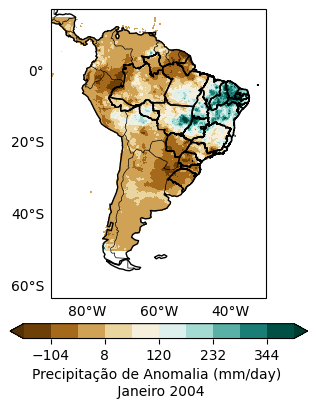

In [21]:
# Configuração da projeção do mapa e sua extensão geográfica
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-90.0, -30.0, -60.0, 15.0))
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

# Configuração das grades do mapa
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.right_labels = False
gl.top_labels = False

# Define os níveis de contorno
levels = np.linspace(-160.0, 400.0, 11)

# Inicializa um gráfico de contorno preenchido com os dados de anomalia
cnplot = ax.contourf(anomalia_jan_2004.longitude, anomalia_jan_2004.latitude, anomalia_jan_2004, cmap='BrBG', levels=levels, extend='both')

# Adiciona uma barra de cores (colorbar) na parte inferior do gráfico
cbar = plt.colorbar(cnplot, orientation='horizontal', pad=0.07, shrink=0.6)
cbar.set_label('Precipitação de Anomalia (mm/day) \n Janeiro 2004')
estados.plot(ax=ax, color='none', edgecolor='black')

# Salva a figura em um arquivo chamado 'anomalia_jan_2004.png' com uma resolução de 300 dpi
# plt.savefig('anomalia_jan_2004.png', dpi=300)

In [22]:
anomalia_jan_2004['time.season']

<xarray.DataArray 'season' ()>
array('DJF', dtype=object)
Coordinates:
    time     datetime64[ns] 2004-01-01
    month    int64 1

In [23]:
precipitacao['time.season']

<xarray.DataArray 'season' (time: 513)>
array(['DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
...
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON'],
      dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-09-01

In [24]:
precipitacao = precipitacao.sel(time=slice('1998-01-01', '2022-12-01'))


In [26]:
precipitacao['time.season']

<xarray.DataArray 'season' (time: 300)>
array(['DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2022-12-01

In [28]:
sclim = precipitacao.groupby('time.season').mean('time')

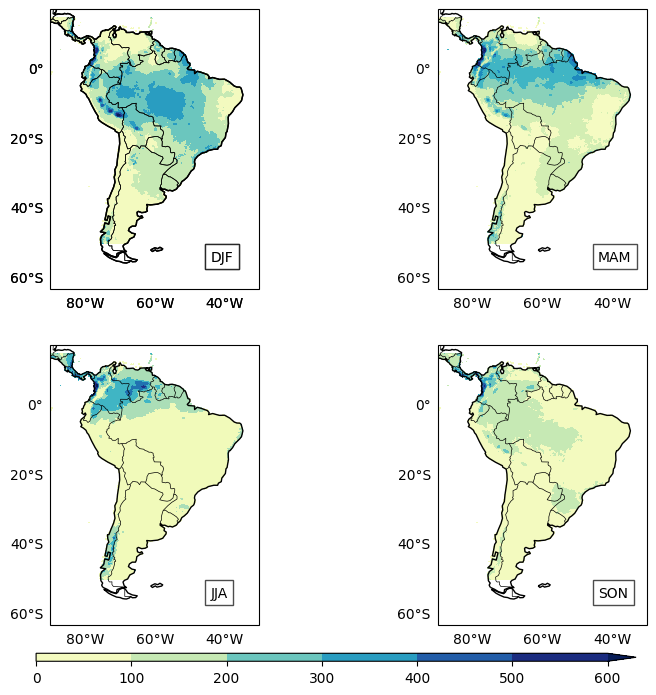

In [29]:
def create_plot(ax, nrow, ncol, data, tlon, season=''):
    ax.set_extent((-90.0, -30.0, -60.0, 15.0))
    ax.coastlines(resolution='110m', color='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.ylines = False
    gl.right_labels = False
    gl.top_labels = False

    levels = np.linspace(0.0, 450.0, 11)
    cnplot = ax.contourf(data.longitude, data.latitude, data.sel(season=season), cmap='YlGnBu', extend='max')
    ax.text(tlon, -55, season, bbox=dict(facecolor='white', alpha=0.7))

    return cnplot

# Cria uma figura e uma grade de subplots
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, hspace=0.2, wspace=0.00)

# Define as estações que deseja plotar
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Cria e plota os subplots para cada estação
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    create_plot(plt.subplot(gs[row, col], projection=ccrs.PlateCarree()), row, col, sclim, -44, season)

# Adiciona uma barra de cores
cax = plt.axes([0.2, 0.065, 0.6, 0.01])
cbar = plt.colorbar(create_plot(plt.subplot(gs[0, 0], projection=ccrs.PlateCarree()), 0, 0, sclim, -44, 'DJF'), cax=cax, orientation='horizontal', pad=0.4)

# Salva a figura e a exibe
plt.savefig('s2-CHIRPS.png', dpi=300)
plt.show()

NameError: ignored

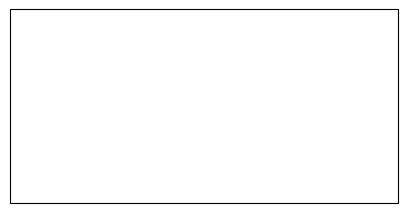

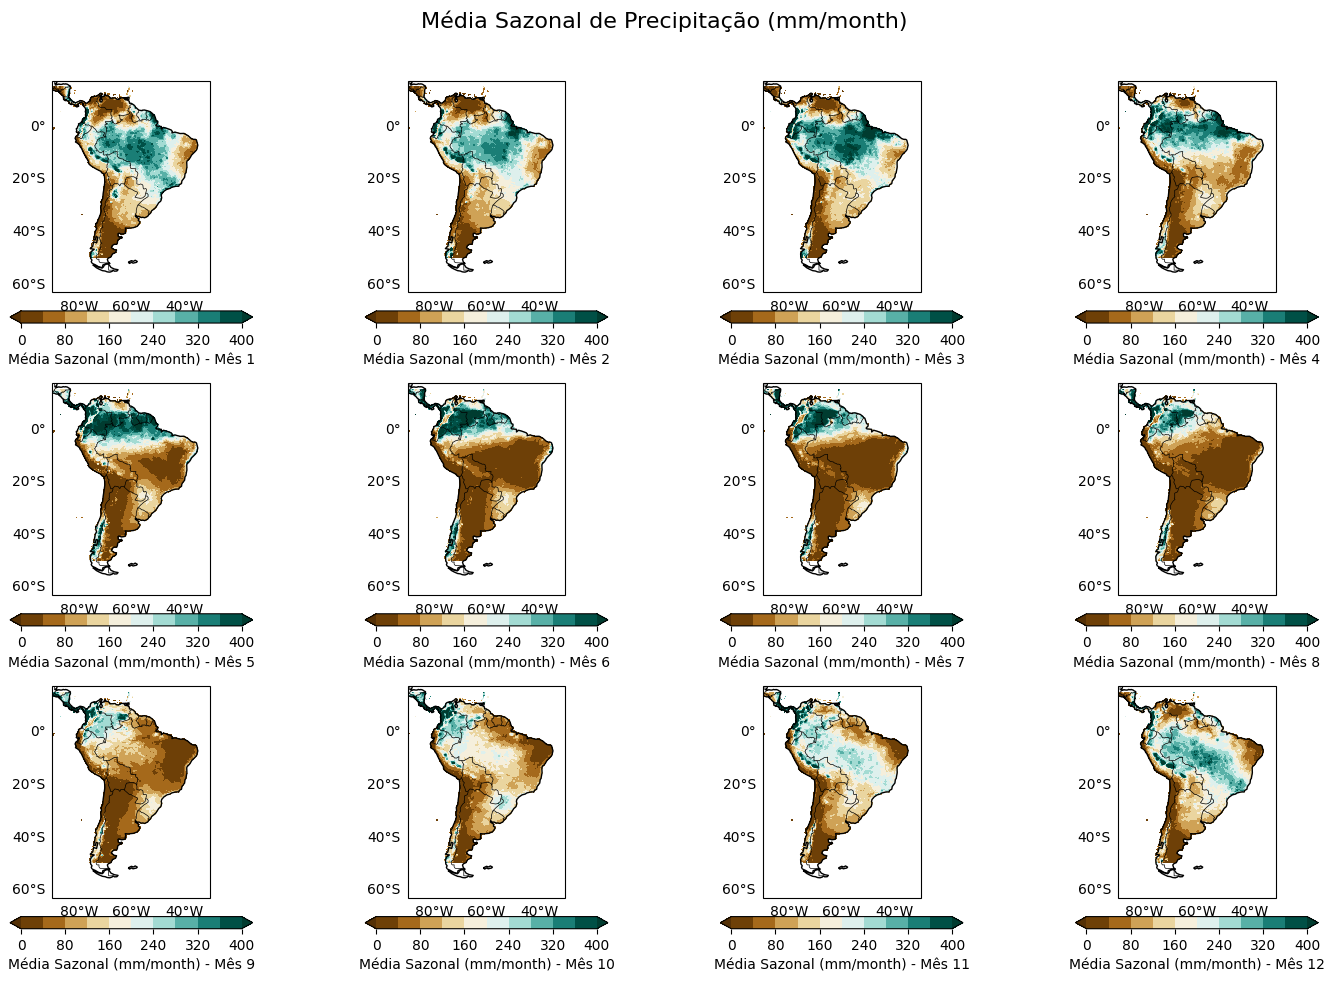

In [ ]:
# Configuração da projeção do mapa e sua extensão geográfica
fig, axs = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Média Sazonal de Precipitação (mm/month)', fontsize=16)

# Define os níveis de contorno
levels = np.linspace(0.0, 400.0, 11)

for i, ax in enumerate(axs.flatten(), start=1):
    # Calcula a média sazonal para o mês i
    media_mensal = media_climatologica.sel(month=i)

    # Inicializa um gráfico de contorno preenchido com os dados de média sazonal
    cnplot = ax.contourf(media_mensal.longitude, media_mensal.latitude, media_mensal, cmap='BrBG', levels=levels, extend='both')

    # Adiciona uma barra de cores (colorbar)
    cbar = plt.colorbar(cnplot, ax=ax, orientation='horizontal', pad=0.07, shrink=0.6)
    cbar.set_label(f'Média Sazonal (mm/month) - Mês {i}')

    # Adiciona limites do mapa e outras características
    ax.set_extent((-90.0, -30.0, -60.0, 15.0))
    ax.coastlines(resolution='110m', color='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

    # Configuração das grades do mapa
    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.ylines = False
    gl.right_labels = False
    gl.top_labels = False

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
ano = 2022
anomalias = var.sel(time=slice(f'{ano}-01', f'{ano}-12')) - media_climatologica